In [92]:
# importando libs
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [66]:
# importar base de dados
df = pd.read_csv('agricultural_raw_material.csv')

In [67]:
# Check nos campso em branco
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

In [68]:
# Substituindo %, "," e "-"
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)

In [69]:
# Drop nas linhas não válidas
df = df.dropna()

In [70]:
# Check para verificar se as linhas não válidas foram retiradas 
df.isnull().sum()

Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64

In [71]:
# Convertendo dados para float (para conseguir efetuar contas)
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
df[lst] = df[lst].astype("float")
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [72]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


In [73]:
df.Month  = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
# Indexing month
df = df.set_index('Month')

In [74]:
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


In [93]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

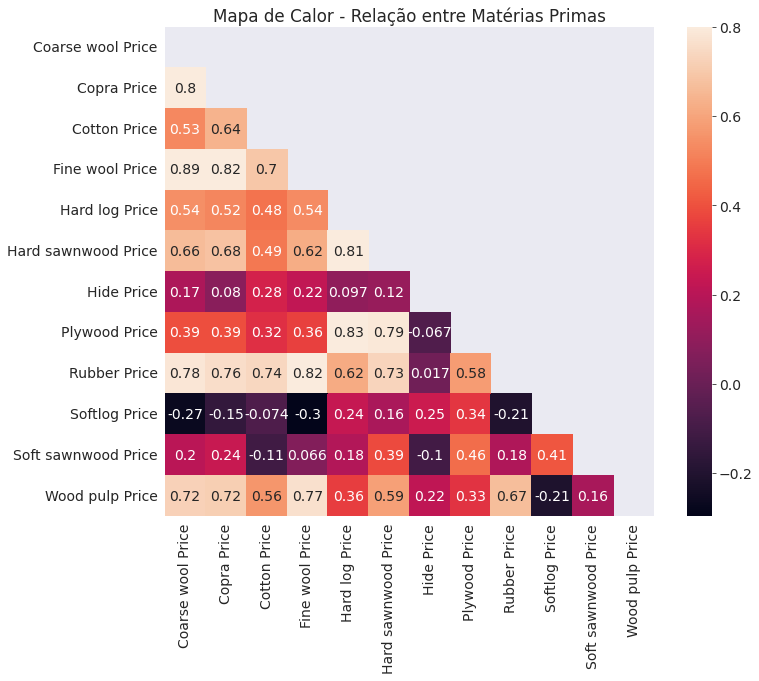

In [94]:
# Lista dos materiais
lista = ['Coarse wool Price',  'Copra Price','Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price',
 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
# Correlação entre as colunas (Quanto mais próximo de 1, maior a correlação)
corrmat = df[lista].corr()
# Diagramação do gráfico (Mapa de Calor)
fig = plt.figure(figsize = (12, 9))
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.title('Mapa de Calor - Relação entre Matérias Primas');
plt.show()

# O mapa de calor mostra a correlação entre as matérias-primas, quanto maior o valor correlacionado maior chance de serem matérias-primas relacionadas

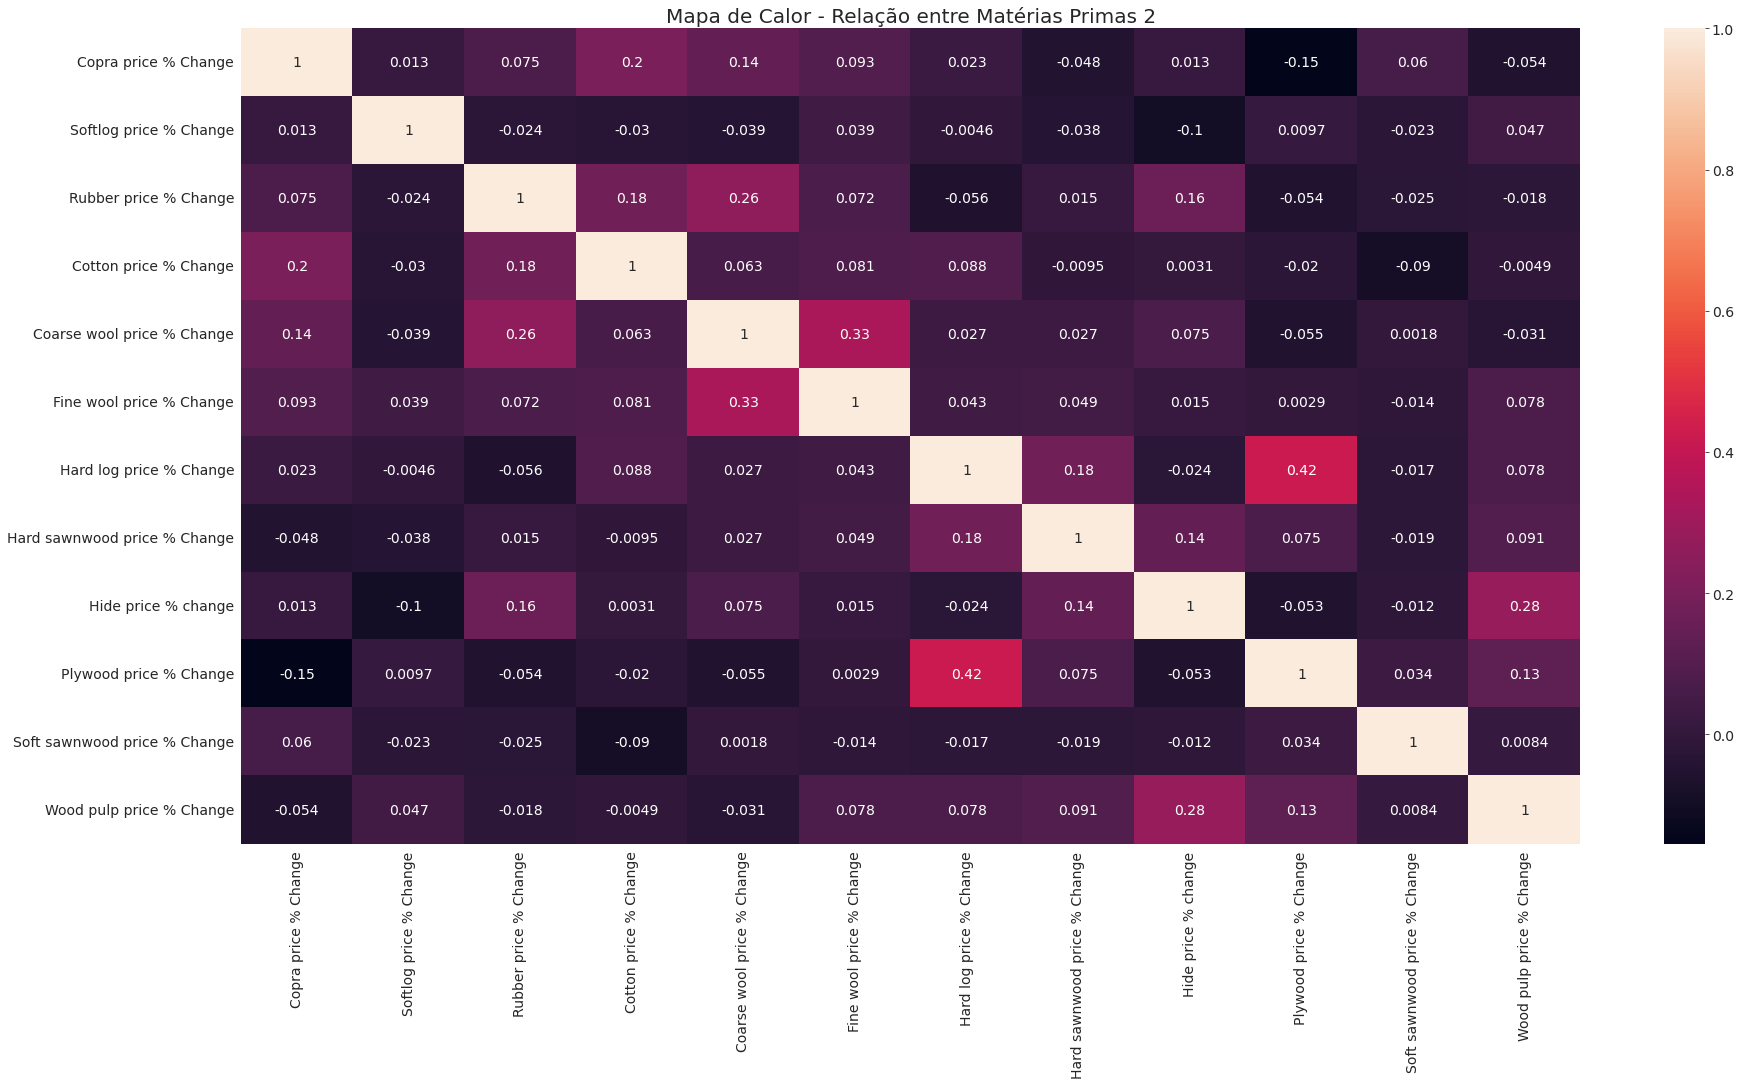

In [95]:
plt.figure(figsize=(30,15))
lista2=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
# Correlação no DataSet
corrMatrix = df[lista2].corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Mapa de Calor - Relação entre Matérias Primas 2', fontsize=20, fontweight=0);
plt.show()

# A partir deste gráfico podemos dizer que quase não há relação entre a variação percentual dos preços das matérias-primas
# Uma correlação forte seria a partir de 0.7
# O valor negativo implica que duas variáveis ​​estão negativamente correlacionadas (um aumento, outro decréscimo)
# Zero implica nenhuma relação

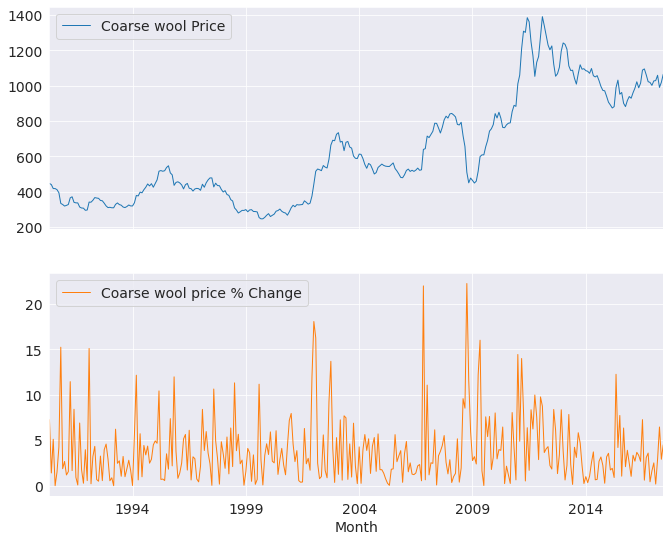

In [99]:
# Gráfico de variação de preços
grafico=df[["Coarse wool Price", "Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)
# Da mesma forma, podemos encontrar a visualização de todos os outros recursos fornecidos no conjunto de dados.

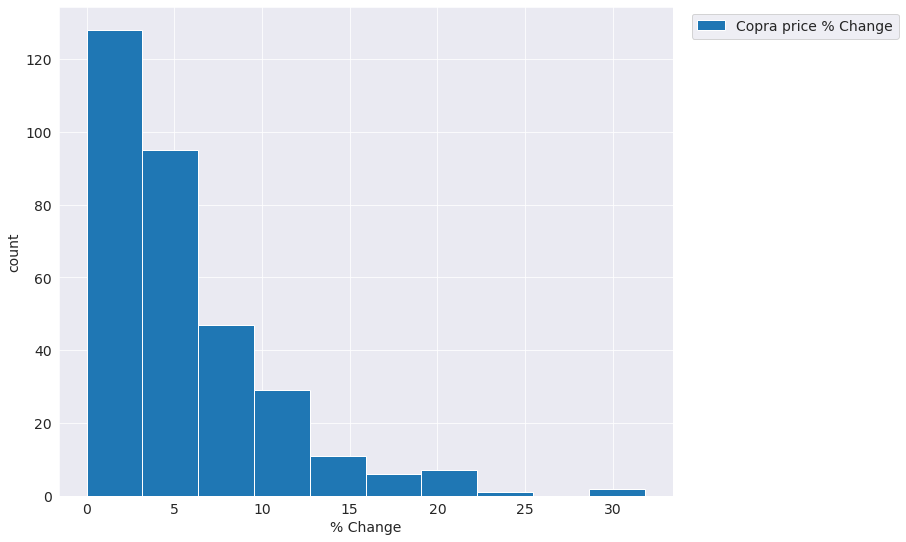

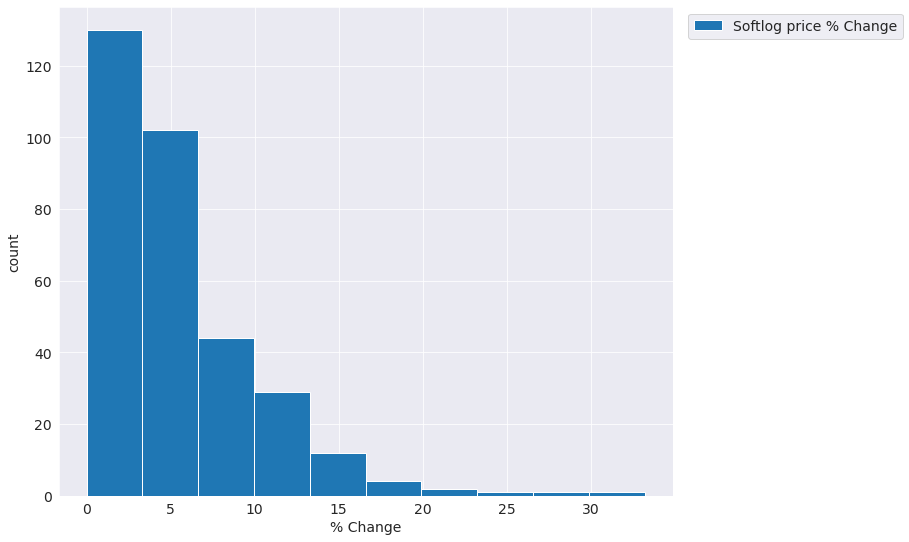

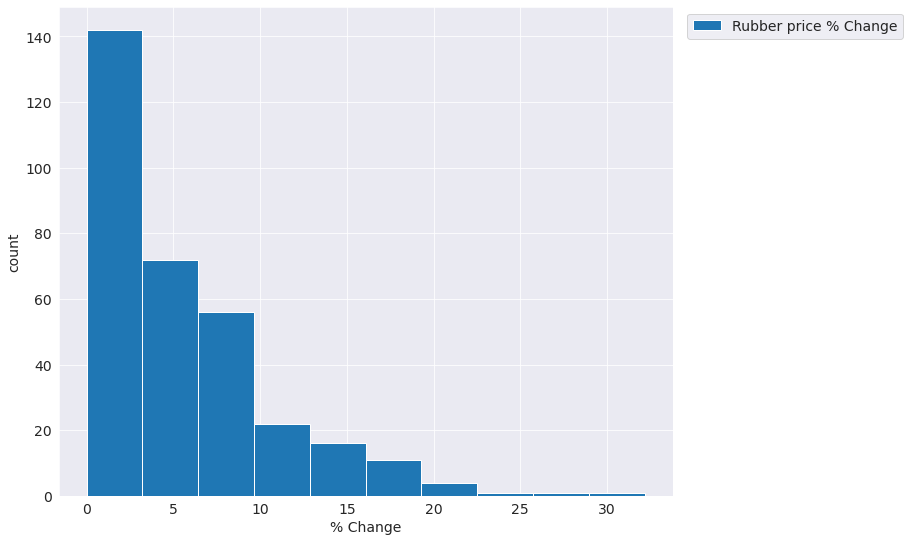

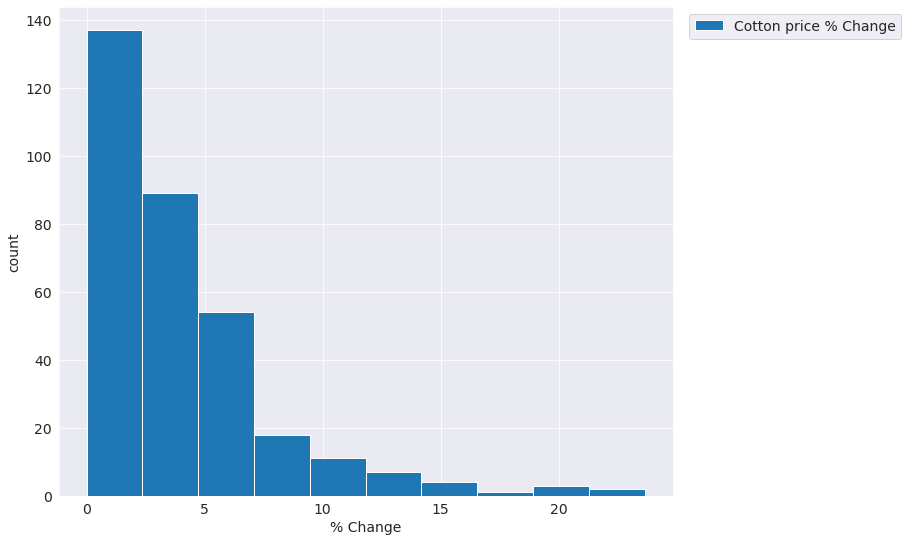

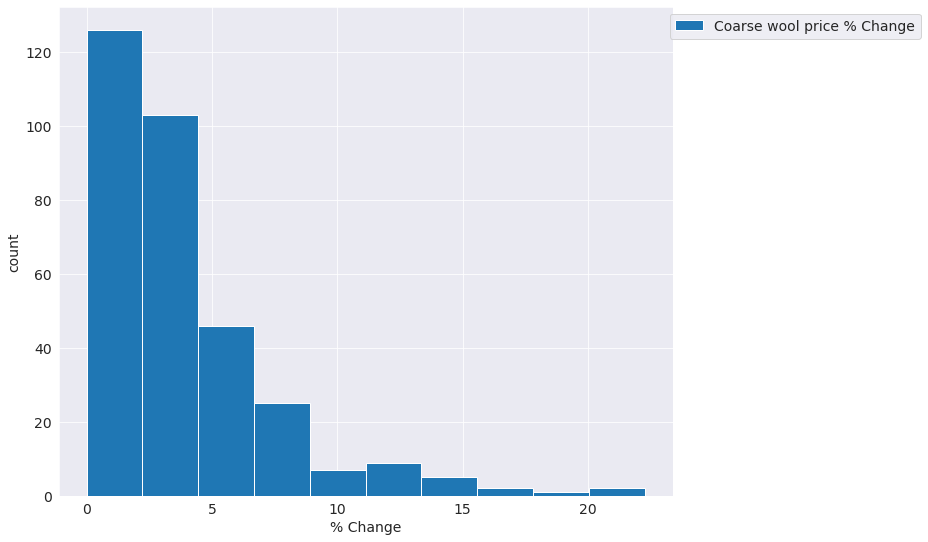

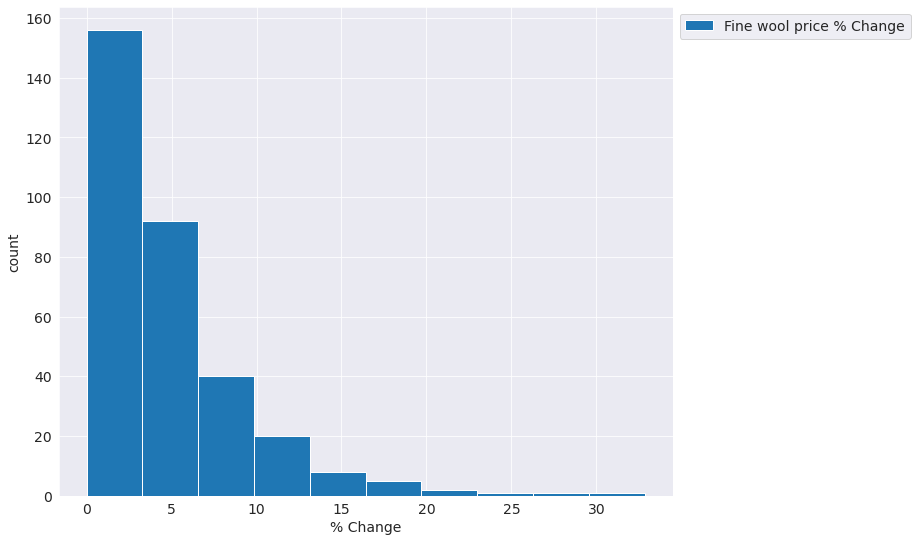

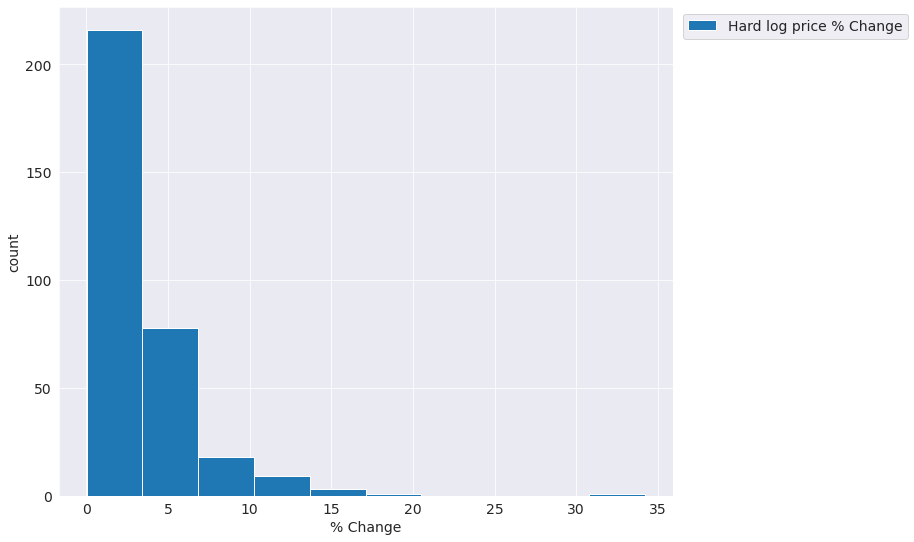

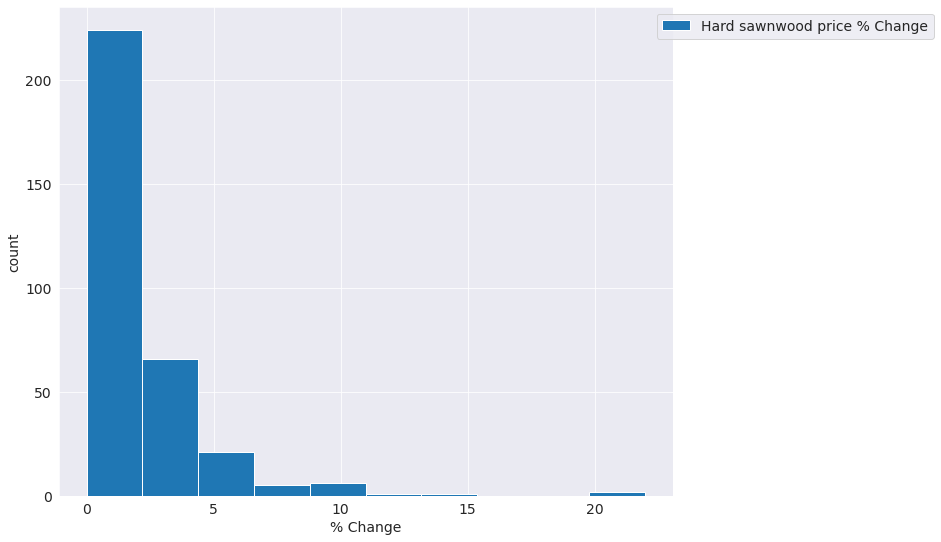

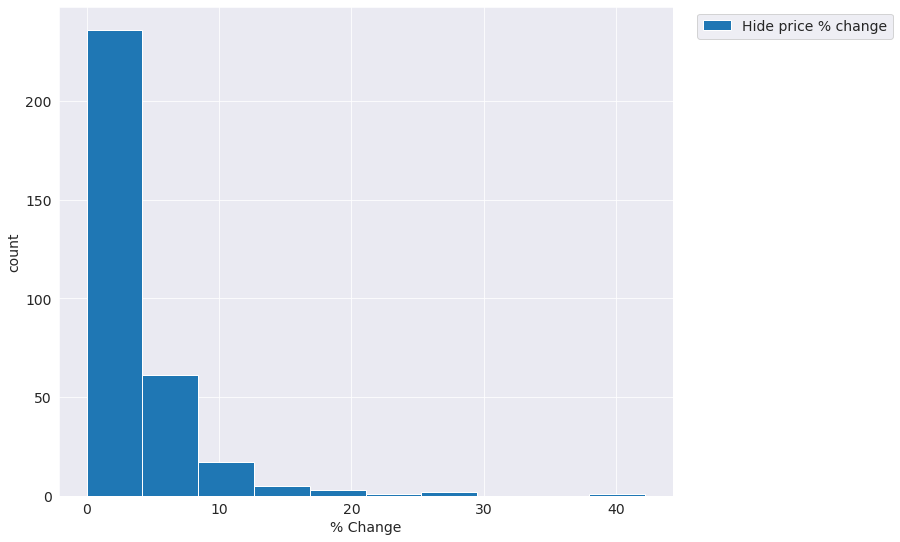

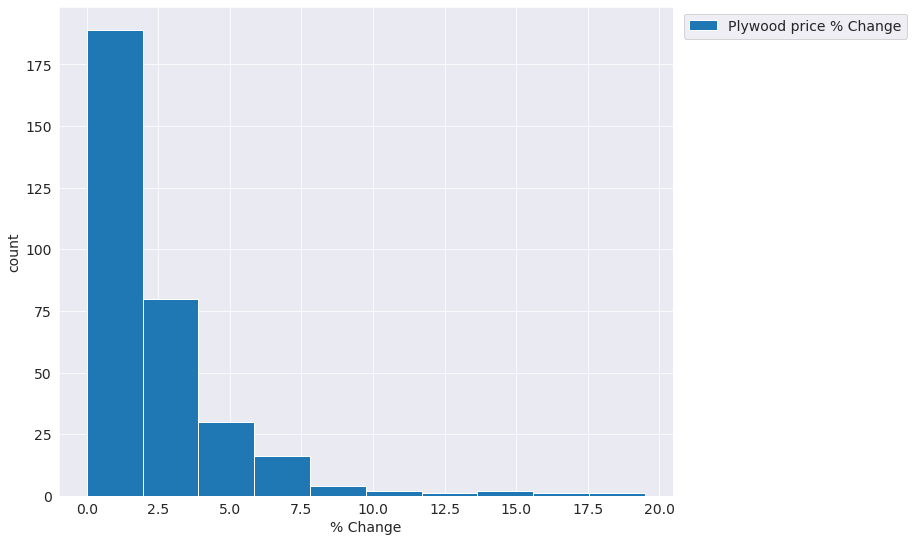

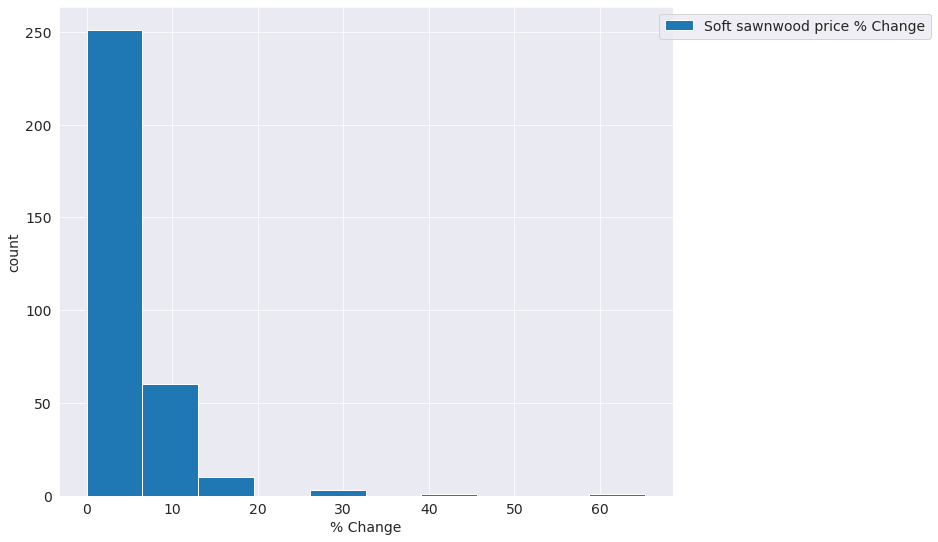

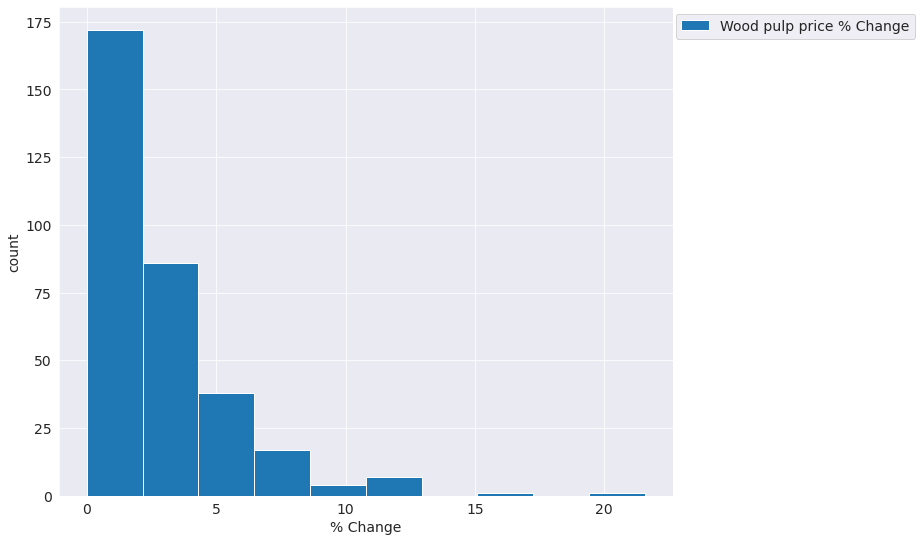

In [101]:
lista3=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
for i in range(len(lista3)):
    plt.figure(figsize=(12,12))
    df[lista3[i]].hist(figsize=(11, 9), linewidth=1)
    plt.xlabel('% Change')
    plt.ylabel('count')
    plt.legend(lista3[i:],loc='upper center',bbox_to_anchor=(1.2,1))

# Podemos observar que a maioria das matérias-primas tem % de mudança frequente inferior a 5%

Text(0.5, 0.98, 'Comparação de Preços')

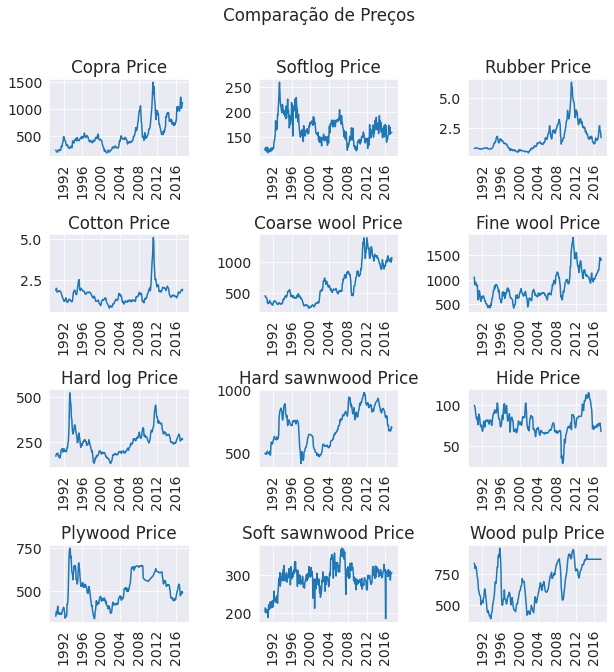

In [102]:
# Matéria-prima que tem o menor preço ao longo dos anos
plt.figure(figsize=(10, 10))
lista_material=['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']
for i in range(len(lista_material)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.title(lista_material[i])
    plt.plot(df[lista_material[i]])
    plt.xticks(rotation=90)
plt.suptitle("Comparação de Preços")

# Podemos ver que o algodão e a borracha são de preços mais baixos

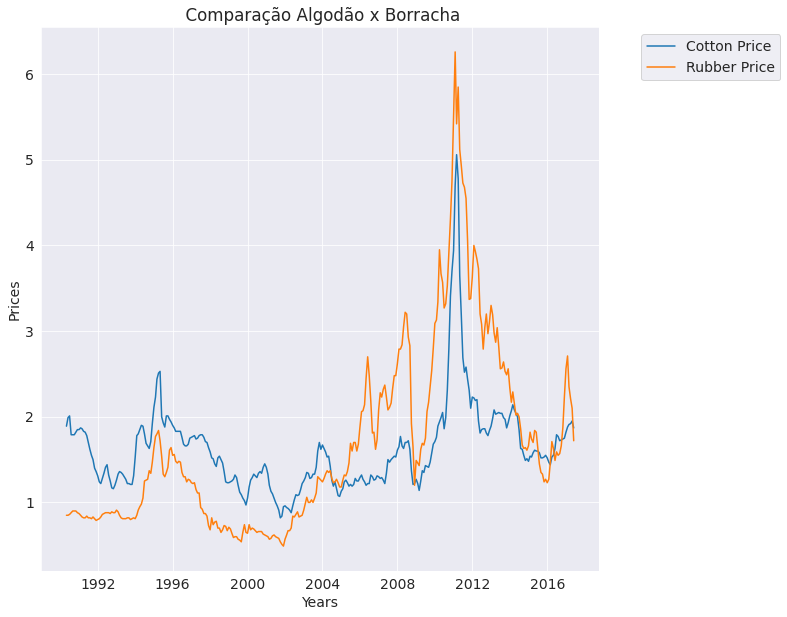

In [105]:
# Comparação Algodão x Borracha
plt.figure(figsize=(10, 10))
plt.plot(df[['Cotton Price','Rubber Price']])
plt.title(" Comparação Algodão x Borracha")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Cotton Price','Rubber Price'],loc='upper center',bbox_to_anchor=(1.2,1))

# Algodão é matéria-prima de menor preço nos últimos anos

# Tanto o algodão quanto a borracha são materiais de baixo preço

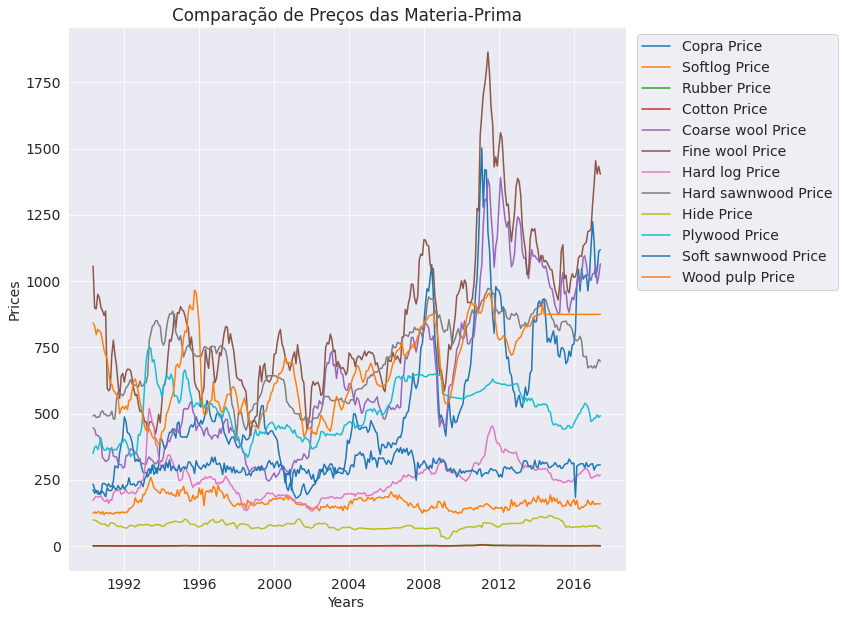

In [107]:
# Comparação de Preços das Materia-Prima
plt.figure(figsize=(10, 10))
plt.plot(df[['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']])
plt.title("Comparação de Preços das Materia-Prima")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price'],loc='upper center',bbox_to_anchor=(1.2,1))

# A partir dos gráficos pudemos analisar as matérias-primas em tipos de acordo com seu preço ao longo dos anos

# Materiais de baixo preço

# - Algodão, couro, softlog, log duro, preço de madeira serrada macia, borracha

# Materiais de alto preço

# - Lã grossa,copra,lã fina,madeira serrada dura,pasta de madeira,madeira compensada

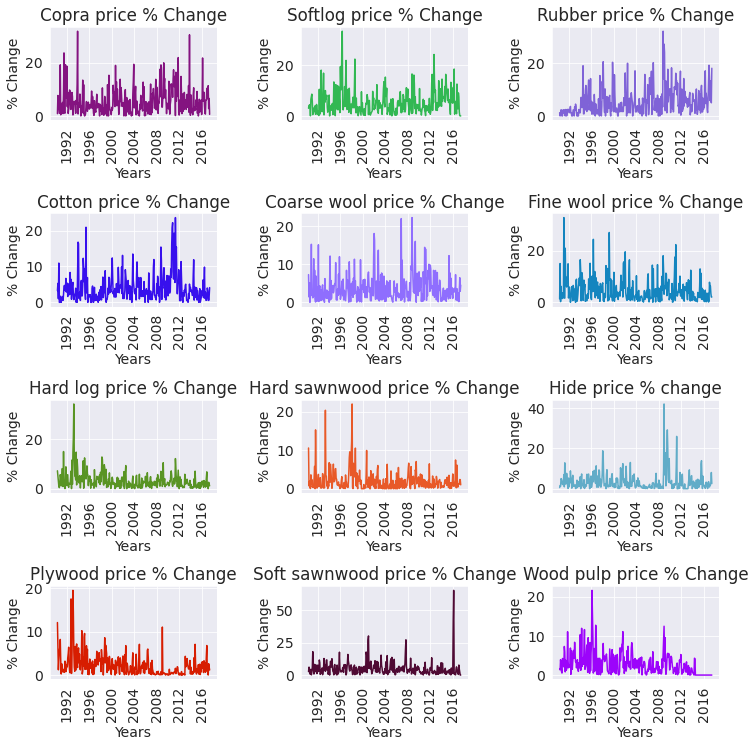

In [121]:
import random as random 

plt.figure(figsize=(12,12))
for i in range(len(lista3)):
   
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.plot(df[lista3[i]],c=color)
    plt.xticks(rotation=90)
    plt.title(lista3[i])
    plt.xlabel('Years')
    plt.ylabel('% Change')

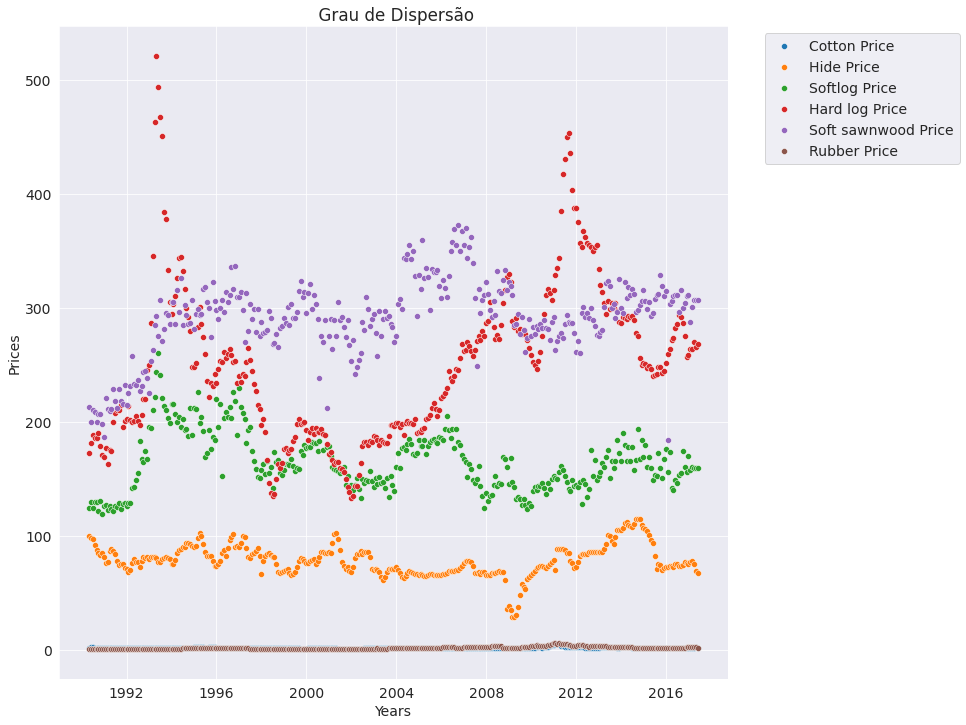

In [122]:
# Gráfico de Dispersão - Quais são materiais-primas que tem uma mudança mais drásticas
lista_preco=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
plt.figure(figsize=(12,12))
plt.title(" Grau de Dispersão")
plt.ylabel('Prices')
plt.xlabel('Years')
for i in range(len(lista_preco)):
    sns.scatterplot(y=df[lista_preco[i]],x=df.index);
    plt.legend(lista_preco,loc='upper center',bbox_to_anchor=(1.2,1))

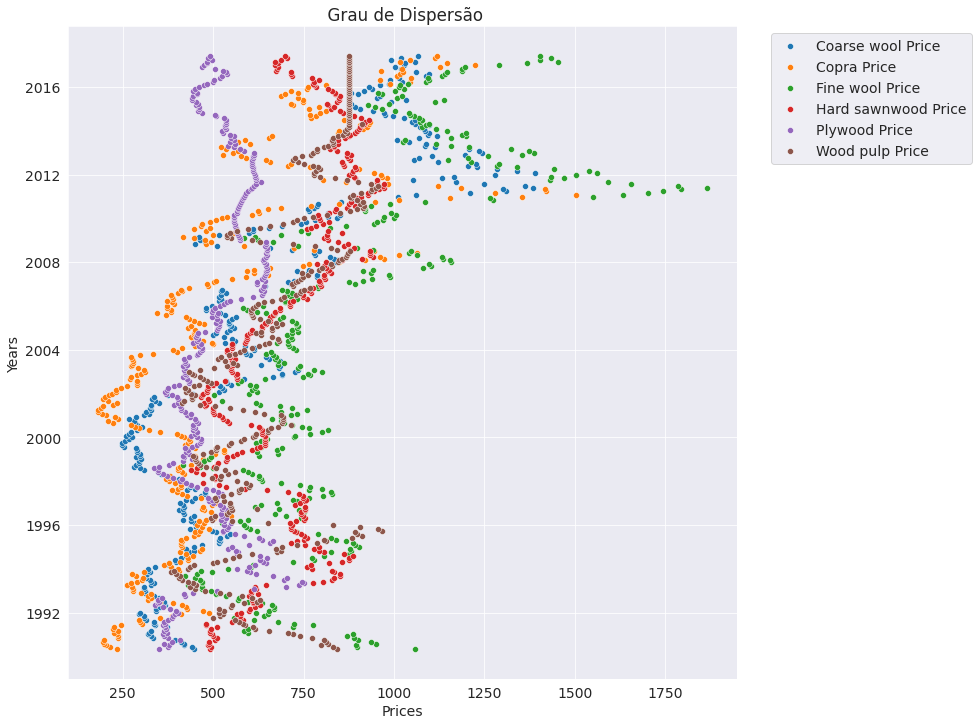

In [123]:
# Gráfico de Dispersão 2 - Quais são materiais-primas que tem uma mudança mais drásticas
lista_preco2=['Coarse wool Price','Copra Price','Fine wool Price','Hard sawnwood Price','Plywood Price','Wood pulp Price']

plt.figure(figsize=(12,12))
plt.title(" Grau de Dispersão")
plt.xlabel('Prices')
plt.ylabel('Years')
for i in range(len(lista_preco2)):
    sns.scatterplot(x=df[lista_preco2[i]],y=df.index);
    plt.legend(lista_preco2,loc='upper center',bbox_to_anchor=(1.2,1))

# Entre os materiais de baixa faixa de preço, a mudança de preço é drástica para o preço da tora dura
# Entre materiais de alto preço, é o preço de lã fina

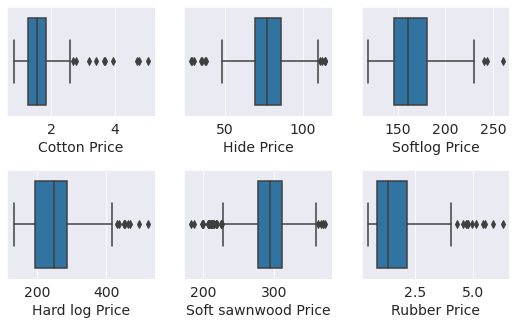

In [124]:
# Faixa de preço entre as matérias-primas de baixo preço
baixo_preco=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
for i in range(6):
    #plt.title(baixo_preco[i])
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust( hspace=0.5 )
    sns.boxplot(x=df[baixo_preco[i]])

In [ ]:
# Alta e baixa % de variação dos materiais
# Pudemos identificar a variação de preços ao longo dos anos.
# Correlação entre eles usando um mapa de calor